In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training/PlantVillage",    
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
className=dataset.class_names

In [5]:
# if you are using .take() in tensorflow just understand like .head() in pandas 
# it will return a batch for the tf.data.Dataset

dataset.take(1)
# now you have to iterate over the Batch returned by the take()



<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print("aaaa")
    print(labels_batch.numpy())

(32, 256, 256, 3)
aaaa
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


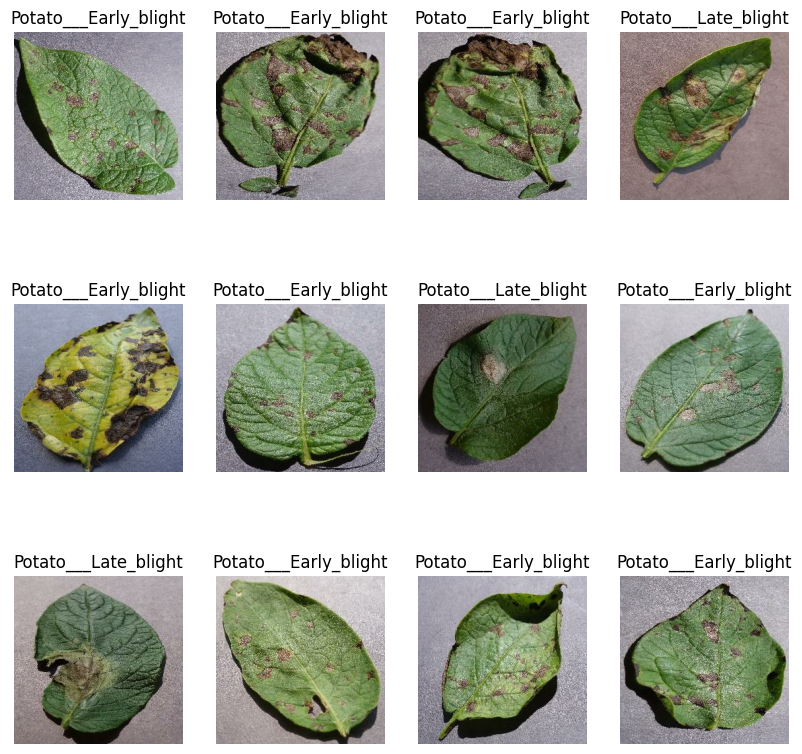

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4,  i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(className[labels_batch[i]])
        plt.axis("off")

In [8]:
len(dataset)

68

In [9]:
# for training===>80%
# for test===>    20%
#     validation==>10
#     test      ==>10


In [10]:
train_size=0.8
test_size=0.2
val_size=0.1

In [11]:
len(dataset)

68

In [12]:
print("for train size:",int(len(dataset)*train_size))
print("for test size:",int(len(dataset)*test_size))

for train size: 54
for test size: 13


In [13]:
x_train=dataset.take(54)   #take is like x[0:54]
len(x_train)

54

In [14]:
x_test=dataset.skip(54)   #skip is like x[54:]
len(x_test)

14

In [15]:
val_ds=x_test.take(7)

In [16]:
x_test=x_test.skip(7)

In [17]:
print(len(x_test),len(val_ds))

7 7


In [18]:
x_train = x_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
x_test = x_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = tf.keras.Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1./255),
])


In [20]:
from tensorflow.keras.layers import RandomFlip, RandomRotation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [23]:
history = model.fit(
    x_test,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.4698 - loss: 0.9897 - val_accuracy: 0.4554 - val_loss: 0.9027
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5248 - loss: 0.8562 - val_accuracy: 0.4732 - val_loss: 0.8732
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 938ms/step - accuracy: 0.5644 - loss: 0.8674 - val_accuracy: 0.4777 - val_loss: 0.8601
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 960ms/step - accuracy: 0.5356 - loss: 0.8667 - val_accuracy: 0.4777 - val_loss: 0.8530
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 943ms/step - accuracy: 0.5729 - loss: 0.8016 - val_accuracy: 0.5848 - val_loss: 0.7960
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 974ms/step - accuracy: 0.6868 - loss: 0.8287 - val_accuracy: 0.5134 - val_loss: 0.8680
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 992ms/step - accuracy: 0.5940 - loss: 0.8120 - val_accuracy: 0.5670 - val_loss: 0.7974
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 913ms/step - accuracy: 0.6804 - loss: 0.7246 - val_accuracy: 0.6652 - val_loss: 0.70

In [24]:
scores = model.evaluate(x_train)

54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 224ms/step - accuracy: 0.9246 - loss: 0.1998


first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
predicted label: Potato___Early_blight


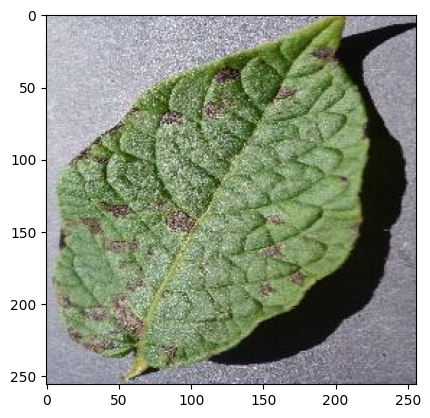

In [25]:
import numpy as np
for images_batch, labels_batch in x_test.take(1):
    
    first_image = images_batch[10].numpy().astype('uint8')
    first_label = labels_batch[10].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",className[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",className[np.argmax(batch_prediction[10])])

In [26]:
from PIL import Image

In [61]:
def test_image():
    img_path = 'image.png'
    img = Image.open(img_path)
    img_array=np.array(img)
    plt.imshow(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    pred=model.predict(img_array)
    print("predicted Class is:",className[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
predicted Class is: Potato___Early_blight


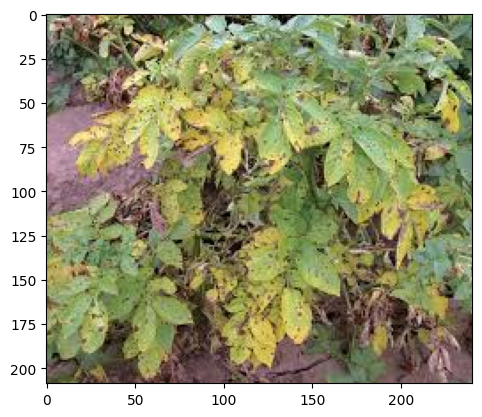

In [65]:
test_image()